In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from preprocessing import data_collection, data_cleansing, log_transformation, differencing, linear_regression, seasonal_decompose_ts
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

We are going to pull the hourly price of Tesla from the previous year

In [2]:
stock_symbol = 'ETN'
data = data_collection(stock_symbol, 365, '1h')

 Let us clean and check the data

In [3]:
data_clean = data_cleansing(data)
data_clean.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-04-25 09:30:00-04:00,164.839996,168.169998,164.500000,165.970001,527283,0.0,0.0
2023-04-25 10:30:00-04:00,165.994995,166.070007,165.250000,165.919998,239018,0.0,0.0
2023-04-25 11:30:00-04:00,165.869995,165.869995,164.729996,165.139999,166168,0.0,0.0
2023-04-25 12:30:00-04:00,165.050003,165.429993,164.139999,164.479996,203497,0.0,0.0
2023-04-25 13:30:00-04:00,164.449997,164.699997,163.860001,164.110001,159137,0.0,0.0
2023-04-25 14:30:00-04:00,164.039993,164.300003,163.639999,163.964996,211833,0.0,0.0
2023-04-25 15:30:00-04:00,163.960007,164.169998,163.630005,163.779999,352760,0.0,0.0
2023-04-26 09:30:00-04:00,162.149994,163.520004,161.970001,162.250000,210028,0.0,0.0
2023-04-26 10:30:00-04:00,162.240005,163.550003,162.110001,163.259995,237073,0.0,0.0


Below shows the stock closing price with SMA

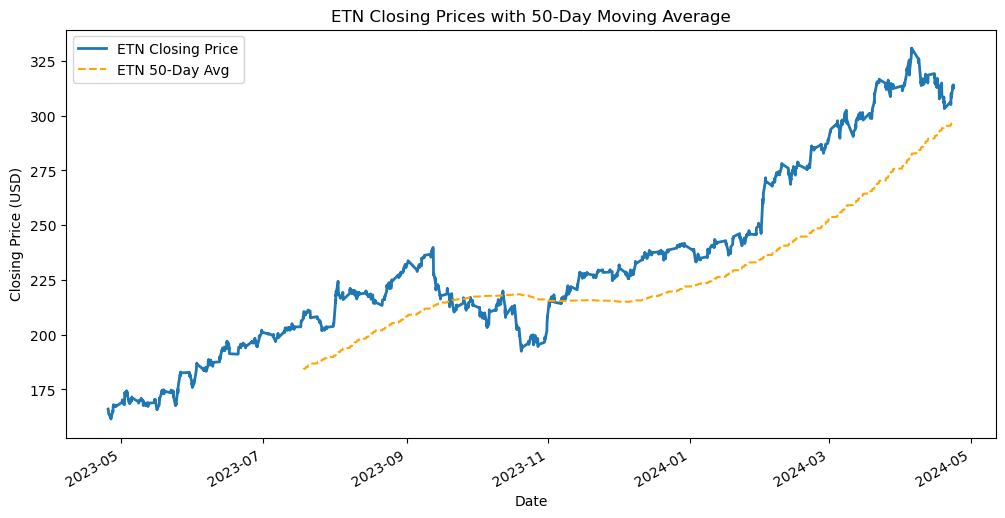

In [4]:
window = 400
plt.figure(figsize=(12, 6))
data_clean['Close'].plot(label=f'{stock_symbol} Closing Price', linewidth=2)
data_clean['Close'].rolling(window=window).mean().plot(label=f'{stock_symbol} 50-Day Avg', linestyle='--', color='orange')
plt.title(f'{stock_symbol} Closing Prices with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

Before applying models like ARIMA, we should check if the time series is stationary

In [5]:
# Check for stationarity using ADF test

result = adfuller(data_clean['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -0.15909905118907616
p-value: 0.9432245280212483
Critical Values:
	1%: -3.4340965268715795
	5%: -2.863194882895319
	10%: -2.5676510108577832


The p-value suggests that the time series is non-stationary. Since ARIMA assumes a linear relationship, if the time series is non-stationary, we should remove trends and seasonality from the data. Below we apply log transformation to remove trends from a time series:

In [6]:
log_transformation(data_clean)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-04-25 09:30:00-04:00,164.839996,168.169998,164.500000,5.111807,527283,0.0,0.0
2023-04-25 10:30:00-04:00,165.994995,166.070007,165.250000,5.111506,239018,0.0,0.0
2023-04-25 11:30:00-04:00,165.869995,165.869995,164.729996,5.106794,166168,0.0,0.0
2023-04-25 12:30:00-04:00,165.050003,165.429993,164.139999,5.102789,203497,0.0,0.0
2023-04-25 13:30:00-04:00,164.449997,164.699997,163.860001,5.100537,159137,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-23 11:30:00-04:00,312.714996,313.578491,311.839996,5.744428,304796,0.0,0.0
2024-04-23 12:30:00-04:00,312.445007,313.579987,312.279999,5.746107,301089,0.0,0.0
2024-04-23 13:30:00-04:00,312.970001,314.190002,312.829987,5.748836,319505,0.0,0.0


We are going to use pmdarima.auto_arima that will automatically select a model with the best differencing order. So what we need to do here is to remove the trend from the data.

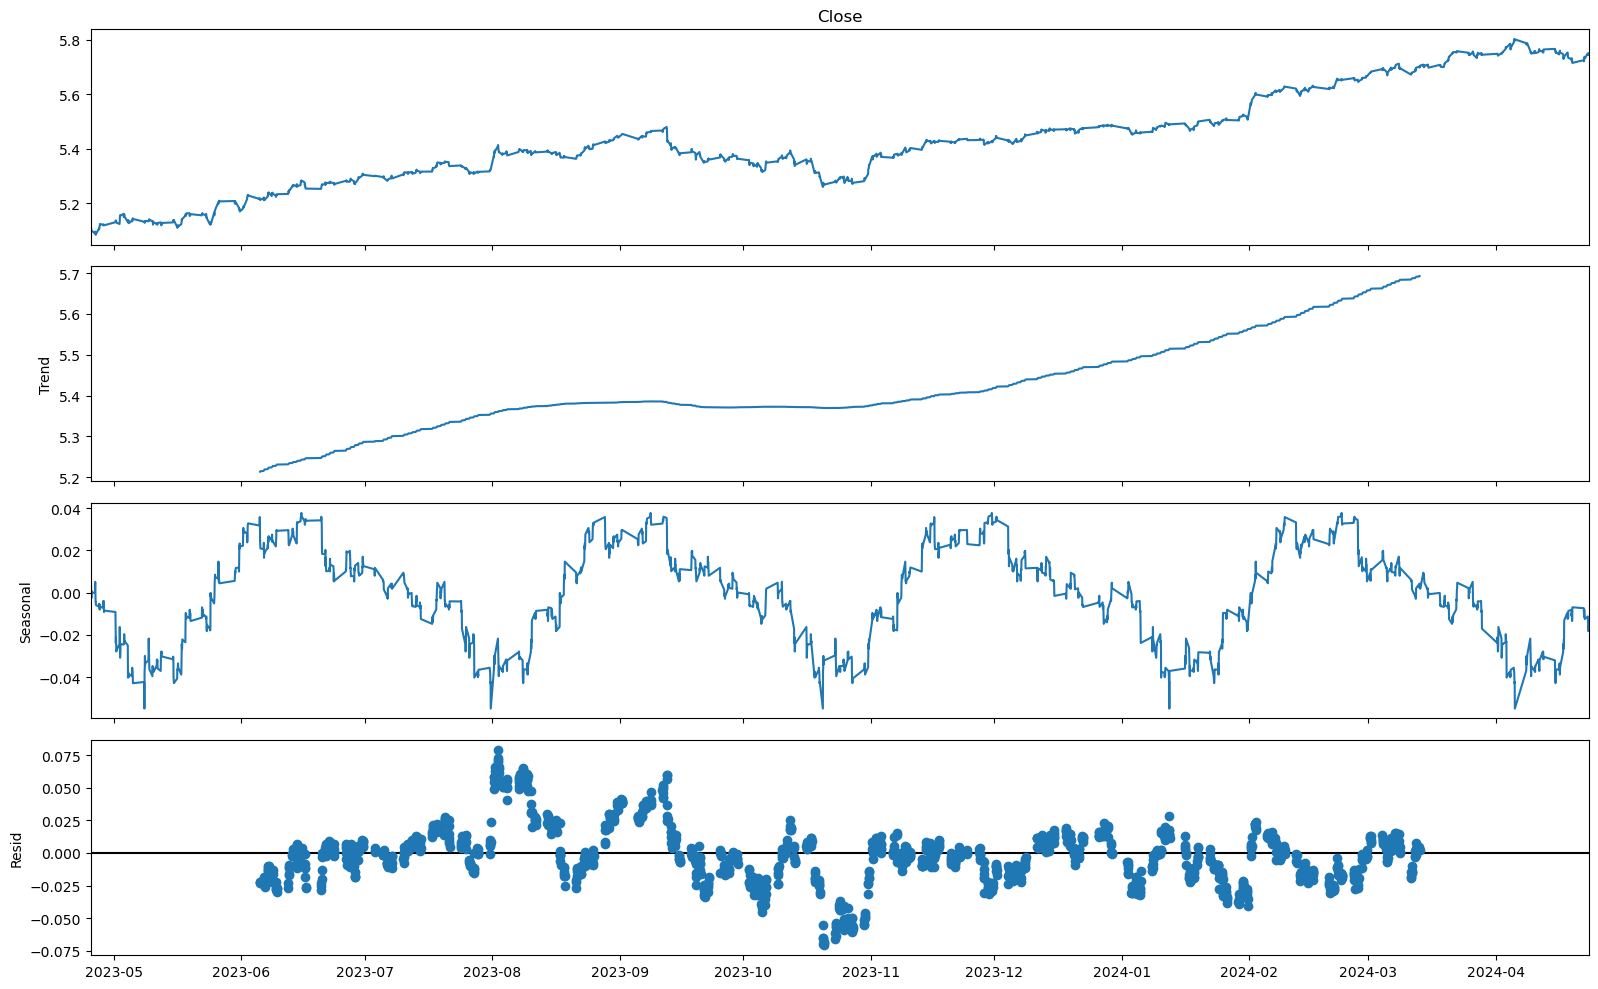

In [7]:
# Seasonal Decomposition
decomposition = seasonal_decompose(data_clean['Close'], model='additive', period=window)
plt.rcParams.update({'figure.figsize': (16, 10)})
decomposition.plot()
plt.show()

In [8]:
data_clean.to_csv('training_data.csv', index=True)